# Introduction to Simple Linear Regression


## Learning Objectives and outcomes

- Introduction of linear regression in the simple setting.

- Basic assumptions of the model.

- Terminology - 'intercept', 'coefficient'.

- The Least Square method.
    
- Implement linear regression in sklearn.




In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
## read data to a dataframe
data=pd.read_csv('data/kc_house_data.csv')
data= data[['sqft_living', 'price']]
## scale price with 1000 so that it will be easier 

In [16]:
df.head(25)

,sqft_living,price
0,1180,221.90
1,2570,538.00
2,770,180.00
3,1960,604.00
4,1680,510.00
5,5420,1225.00
6,1715,257.50
7,1060,291.85
8,1780,229.50
9,1890,323.00


In [35]:
data['price'] = data.price*1000

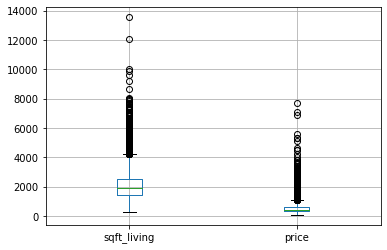

In [36]:
## visualize the 'price' and 'sqft_living' with boxplot
data.boxplot()
## watch  out the scales 


In [37]:
## use pandas for boxplots

#fig, axs=  plt.subplots(1,2, figsize=(10,5), sharey=False)


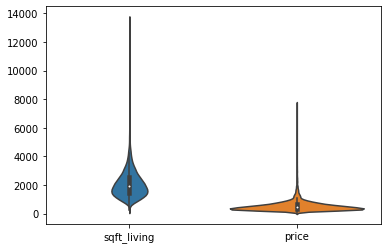

In [38]:
import seaborn as sns

sns.violinplot(data = data)

In [39]:
## AS you can see there are outliers - let's cut them from our dataset - use 0.98 as the quantile
data.quantile(q=0.98)

sqft_living    4410.0
price          1600.0
Name: 0.98, dtype: float64

In [40]:
idx = (data<data.quantile(q=0.98)).all(axis=1)#boolean masking
data=data[idx]

### Assumptions

* Assume $\mbox{price} \approx \mbox{sqft_living}$  linearly.

* There is an initial value (baseline) of the price. 

* Data might not be exactly linear but the errors are random.

### Model  - Single Variable Case

$$ Y = b_{0} + b_{1}X + \epsilon$$
 
- $ b_{0}, b_{1}$ are called the intercept and coefficient of the linear model respectively. 

- $\epsilon$ is the error term.

- Given $\widehat{b_{0}}$ and $\widehat{b_{1}}$ we will make a prediction:

$$ \widehat{y_{i}} = \widehat{b_{0}} + \widehat{b_{1}} x_{i} $$

<img src="best_fit.png" cap="Transformed dataset"  width='300'/>



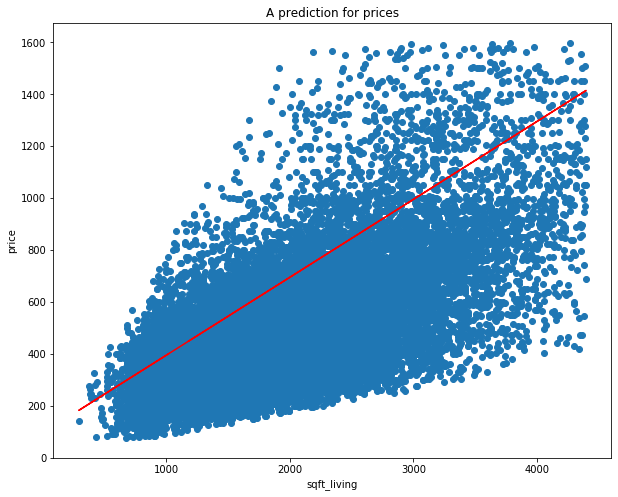

In [54]:
## play with this function what happens when you change b0_hat and b1_hat
# assumptions are mean are 0 and variance is constant, and error is random and normally distributed
X = data.sqft_living.values
y = data.price.values


def pred(b0_hat, b1_hat):
    y_pred = b0_hat + b1_hat * X
    
    
    data['predicted'] = y_pred
    
    # Data for plotting
    t = data.sqft_living.values
    s = data.predicted.values
    
    plt.figure(figsize= (10,8))

    

    plt.scatter(x= data.sqft_living, y= data.price)
    plt.plot(t, s, c= 'r')

    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.title('A prediction for prices')

    plt.show()
    return 

pred(95, 0.3)


### What do we mean by 'best fitting line'? Least Squares

<a name="least_squares">
</a>

__Q: How to find 'best' line?__


<img src="errors.png" cap="Transformed dataset"  width='500'/>



* Recall that we know actual values $y$ for the prices and for any coefficients $b_{0}, b_{1}$ we can make a prediction $\widehat{y}$. 

* Error for each prediction $e_{i} = y_{i} - \widehat{y_{i}}$



### Residual sum of squares


$$RSS = e_{1}^{2} + e_{2}^{2} + \cdots + e_{n}^{2}$$

* Wait a minute! Why do we get the squares?


The least square method minimizes the RSS.

* Good news: The least square can be calculated exactly because it has a closed form:

$$ \mbox{RSS} = (y_1 - \widehat{b_{0}} -\widehat{b_{1}}x_{1} )^{2} + (y_2 - \widehat{b_{0}} -\widehat{b_{1}}x_{2} )^{2} + \cdots + (y_n - \widehat{b_{0}} -\widehat{b_{1}}x_{n} )^{2}$$

* Bad news: It requires derivatives and is complicated to derive. But no worries, python will take care of this step for us.

$$ b_{1} = \dfrac{\sum^{n}_{i=1} (x_i - \bar{x})(y_{i}-\bar{y})}{\sum^{n}_{i=1} (x_i - \bar{x})^{2}}$$

and 

$$ b_0 = \bar{y} - b_{1}\bar{x} $$


Let's see linear regression in action.


<a name="sklearn">
</a>

## Linear Regression Using sklearn

In [56]:
from sklearn.linear_model import LinearRegression

In [68]:
X=data.sqft_living.values
Y=data.price.values
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [69]:

lr=LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lr.coef_
lr.intercept_

array([91.32238849])

In [64]:
# define X and y again here and reshape them



# import LinearRegression from sklearn


# Initialize the LinearRegression Object


# Fit the model


# print intercept and coef attributes of LinerRegression Object



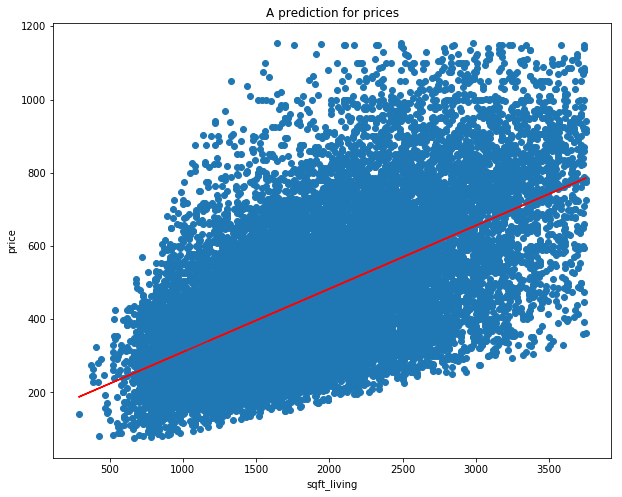

In [12]:
## call pred function to see the 'best fitting line'

pred(intercept, coef)

## Further Reading <a name='further_reading'></a>

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf